<a href="https://colab.research.google.com/github/SolieSoftware/TensorFlow-Tutorials/blob/main/Module4_TensorFlow_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Module 4 Neural Networks

In [ ]:
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

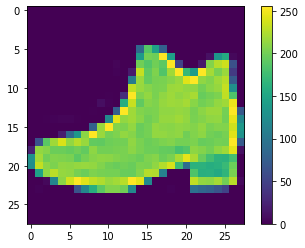

In [ ]:
plt.figure()
plt.imshow(train_images[15])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#preprocess to scale down greyscale pixel values to between 0 and 1.
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=8)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2313 - accuracy: 0.9143
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2239 - accuracy: 0.9164
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2185 - accuracy: 0.9182
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2099 - accuracy: 0.9211
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2048 - accuracy: 0.9231
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1988 - accuracy: 0.9256
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1939 - accuracy: 0.9259
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1888 - accuracy: 0.9284


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3482 - accuracy: 0.8770
Test accuracy: 0.8769999742507935


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([8.4265700e-08, 1.0678275e-12, 1.6079720e-12, 3.9192879e-15,
       2.3587379e-10, 6.0186936e-05, 5.7372307e-07, 9.9477835e-04,
       4.6775894e-10, 9.9894434e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0]) #returns index of the largest values in the list

9

In [ ]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


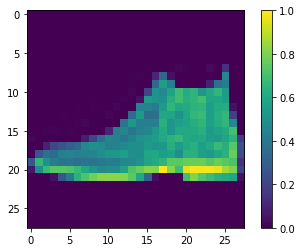

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
test_labels[0]

9

Pick a number: 45
1/1 [==============================] - 0s 25ms/step


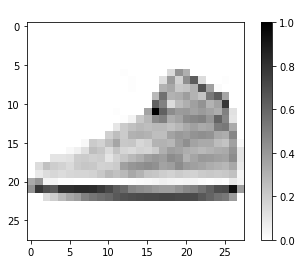

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
